<a href="https://colab.research.google.com/github/Santoshuske/Flipkart-Mobile-Review-Analysis/blob/main/Updated_Product_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Flipkart_Amazon Mobile Reviews.csv')
df.head()

,Unnamed: 0,Review-Title,rating,Review-Body,Product Name
0,0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
1,1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
2,2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
3,3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."
4,4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12..."


In [3]:
df.shape

(23777, 5)

In [4]:
df.isnull().sum()

Unnamed: 0        0
Review-Title      2
rating            0
Review-Body     617
Product Name      0
dtype: int64

In [5]:
df.columns

Index(['Unnamed: 0', 'Review-Title', 'rating', 'Review-Body', 'Product Name'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df['rating'].unique()

array(['1.0 out of 5 stars', '2.0 out of 5 stars', '5.0 out of 5 stars',
       '3.0 out of 5 stars', '4.0 out of 5 stars'], dtype=object)

In [8]:
df['Rating']= df.rating.map({'1.0 out of 5 stars':1.0, '2.0 out of 5 stars':2.0, '5.0 out of 5 stars':5.0,
       '3.0 out of 5 stars':3.0, '4.0 out of 5 stars':4.0})

In [9]:
df['Rating'].unique()

array([1., 2., 5., 3., 4.])

In [10]:
df.head()

,Review-Title,rating,Review-Body,Product Name,Rating
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0


In [11]:
df.dropna(inplace=True)


In [12]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'Product Name', 'Rating'], dtype='object')

In [13]:
df.rename(columns={'Product Name':'ProductName'},inplace=True)

In [14]:
df['ProductName'].unique()

array(['OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)',
       'Samsung Galaxy M32',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)'],
      dtype=object)

In [15]:
df['Brand']= df.ProductName.map({'OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 128GB Storage)':'OnePlus',
       'OPPO A31 (Mystery Black, 6GB RAM, 128GB Storage)':'Oppo',
       'realme narzo 50A (Oxygen Blue , 4GB RAM + 64 GB Storage)':'Realme',
       'Redmi 10 Prime (Bifrost Blue 4GB RAM 64GB ROM ':'Redmi10',
       'Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage)':'Redmi9Activ',
       'Redmi Note 11 (Space Black, 4GB RAM, 64GB Storage)':'RedmiNote11',
       'Samsung Galaxy M32':'Sumsung',
       'vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128GB Storage)':'Vivo'})

In [16]:
df['Brand'].unique()

array(['OnePlus', 'Oppo', 'Realme', 'Redmi10', 'Redmi9Activ',
       'RedmiNote11', 'Sumsung', 'Vivo'], dtype=object)

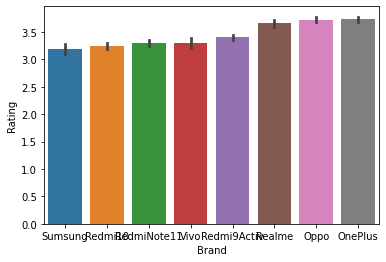

In [17]:
import seaborn as sns
sns.barplot(x=df.Brand,y=df.Rating,order=df.groupby('Brand')['Rating'].mean().reset_index().sort_values('Rating')['Brand'])

In [18]:
df1=df[(df['Rating']==5.0)]
df1.shape

(9069, 6)

In [19]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df, values='Rating', names='Brand')
fig.show()

In [20]:
df_five=df.loc[df['Rating'] == 5.0]
df_five

,Review-Title,rating,Review-Body,ProductName,Rating,Brand
2,Awesome look,5.0 out of 5 stars,Camera is so good n very fast phone back look ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0,OnePlus
6,A good choice for upgrade,5.0 out of 5 stars,Nord CE 2 is a decent choice for someone looki...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0,OnePlus
9,Excellent all rounder!,5.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0,OnePlus
11,amazing,5.0 out of 5 stars,Very amazingly built & decently featured smart...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0,OnePlus
15,Amazing Phone,5.0 out of 5 stars,Best Operating system after iPhone so you and ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",5.0,OnePlus
...,...,...,...,...,...,...
23766,Very nice,5.0 out of 5 stars,Sa,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5.0,Vivo
23769,Iqoo z6 5g,5.0 out of 5 stars,The mobile is good value for money 💰,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5.0,Vivo
23770,Super,5.0 out of 5 stars,Very nice,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5.0,Vivo
23771,Product is good,5.0 out of 5 stars,Oder not completCharger adaptor missingI have ...,"vivo iQOO Z6 5G (Chromatic Blue, 6GB RAM, 128G...",5.0,Vivo


In [21]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df_five, values='Rating', names='ProductName')
fig.show()

In [22]:
df_four=df.loc[df['Rating'] == 4.0]
df_four.head()

,Review-Title,rating,Review-Body,ProductName,Rating,Brand
5,Fantastic but some bug fixes required!,4.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4.0,OnePlus
12,A decent package for non gamers and everything...,4.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4.0,OnePlus
14,Good overall performance,4.0 out of 5 stars,Bought this for my mother on the day of the la...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4.0,OnePlus
22,Read this before you buy this!!!!,4.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4.0,OnePlus
35,One of the best midrange 5G Phone,4.0 out of 5 stars,Superb display cool design light weight. Fast ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",4.0,OnePlus


In [23]:
df_four.shape

(4749, 6)

In [24]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df_four, values='Rating', names='Brand')
fig.show()

In [25]:
df_three=df.loc[df['Rating'] == 3.0]
df_three.head()

,Review-Title,rating,Review-Body,ProductName,Rating,Brand
3,One plus losing is originality!!!,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0,OnePlus
7,Camera is not good... oppo is the best,3.0 out of 5 stars,Phone is over all good but some heating proble...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0,OnePlus
13,Phone hang issue,3.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0,OnePlus
28,Average Phone. So keep average expectations.,3.0 out of 5 stars,Writing the reviews after 3 days of UsageDesig...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0,OnePlus
56,Average phone,3.0 out of 5 stars,I didn't upload pics cause I forgot to take th...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",3.0,OnePlus


In [26]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df_three, values='Rating', names='Brand')
fig.show()

In [27]:
df_two=df.loc[df['Rating'] == 2.0]
df_two.head()

,Review-Title,rating,Review-Body,ProductName,Rating,Brand
1,Ok !!! Not up to the mark,2.0 out of 5 stars,I'm writing this review after using 3days !!!B...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0,OnePlus
18,Hang problem,2.0 out of 5 stars,The media could not be loaded.\n ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0,OnePlus
25,"Not worthable, so many Back drops, i am totall...",2.0 out of 5 stars,Over heating while charging & too much heating...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0,OnePlus
33,Not expected this from an oneplus phone,2.0 out of 5 stars,As a tech geek these are my experiences with t...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0,OnePlus
39,"Not for any audiophile, USB audio is buggy",2.0 out of 5 stars,The USB audio in oneplus phone is merged with ...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",2.0,OnePlus


In [28]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df_two, values='Rating', names='Brand')
fig.show()

In [29]:
df_one=df.loc[df['Rating'] == 1.0]
df_one.head()


,Review-Title,rating,Review-Body,ProductName,Rating,Brand
0,Worst phone ever,1.0 out of 5 stars,Hang problem,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0,OnePlus
4,Read,1.0 out of 5 stars,I got my delivery on 23 feb when I unboxed the...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0,OnePlus
8,****VERY DISPOINTED BY 1PLUS****. Sound and ba...,1.0 out of 5 stars,****Don't buy any phones from Amazon*** i real...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0,OnePlus
10,bakwas mobile hai,1.0 out of 5 stars,bakwas mobile hai,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0,OnePlus
19,Disappoint with build quality and display,1.0 out of 5 stars,Phone's display and camera not upto the mark w...,"OnePlus Nord CE 2 5G (Gray Mirror, 8GB RAM, 12...",1.0,OnePlus


In [30]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
#data = px.df.tips()
fig = px.pie(df_one, values='Rating', names='Brand')
fig.show()

In [31]:
df.columns

Index(['Review-Title', 'rating', 'Review-Body', 'ProductName', 'Rating',
       'Brand'],
      dtype='object')

In [32]:
# Replacing punctuations with space
df['review_processed'] = df['Review-Body'].str.replace("[^a-zA-Z0-9]", " ")

# Re ordering columns
df = df[['Review-Body','review_processed','Rating','Brand','Review-Title']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [33]:
df['review_processed']

0                                             Hang problem
1        I m writing this review after using 3days    B...
2        Camera is so good n very fast phone back look ...
3        The media could not be loaded                 ...
4        I got my delivery on 23 feb when I unboxed the...
                               ...                        
23772    Must he Bhai iss range me bas cemra thoda sa s...
23773                                         Good product
23774                                                 Good
23775    Don t buy this mobile phone money weast screen...
23776    Phone is Good   Camera not upto the mark  UI i...
Name: review_processed, Length: 23159, dtype: object

In [34]:
df['review_processed'] = df['review_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Lower Case

In [35]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')

# Making custom list of words to be removed 
add_words = ['mobile','phone','one','make','even','like','see','movies','get','makes','making']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [38]:
df.head()

,Review-Body,review_processed,Rating,Brand,Review-Title
0,Hang problem,hang problem,1.0,OnePlus,Worst phone ever
1,I'm writing this review after using 3days !!!B...,write review use 3days honest normal android p...,2.0,OnePlus,Ok !!! Not up to the mark
2,Camera is so good n very fast phone back look ...,camera good fast back look awesomewith dis pri...,5.0,OnePlus,Awesome look
3,The media could not be loaded.\n ...,medium could load average product decent day d...,3.0,OnePlus,One plus losing is originality!!!
4,I got my delivery on 23 feb when I unboxed the...,get delivery feb unboxed display damage reques...,1.0,OnePlus,Read


In [39]:
df['Rating'].unique()

array([1., 2., 5., 3., 4.])

In [40]:
df['Sentiment']= df.Rating.map({1.0:0.0,2.0:0.0,3.0:0.0,4.0:1.0,5.0:1.0})

In [41]:
df['Sentiment'].unique()

array([0., 1.])

In [71]:
df['sentiment']= df.Rating.map({1.0:'negative',2.0:'negative',3.0:'negative',4.0:'positive',5.0:'positive'})

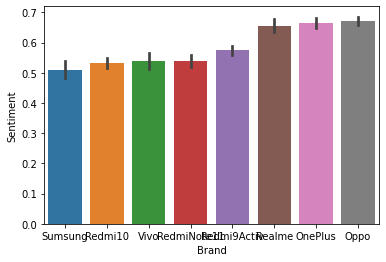

In [58]:
import seaborn as sns
sns.barplot(x=df.Brand,y=df.Sentiment,order=df.groupby('Brand')['Sentiment'].mean().reset_index().sort_values('Sentiment')['Brand'])

In [64]:
vc_df = pd.DataFrame(df['Sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,positive,13818
1,negative,9341


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



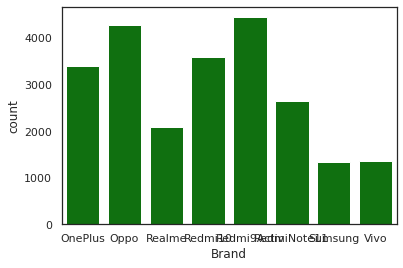

In [76]:
sns.countplot(df['Brand'],color='green')

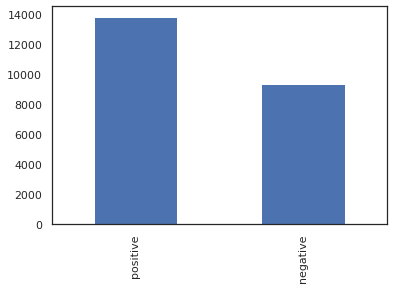

In [77]:
df['sentiment'].value_counts().plot(kind='bar')

# Percentage of Positive and Negative Review

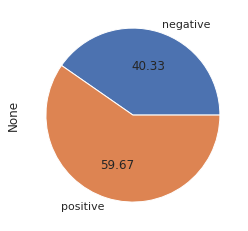

In [80]:
df.groupby('sentiment').size().plot(kind='pie',autopct='%.2f')

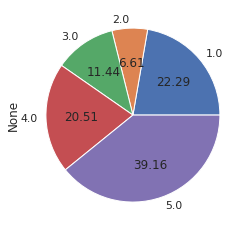

In [82]:
df.groupby('Rating').size().plot(kind='pie',autopct='%.2f')

# Mobiles Percentage

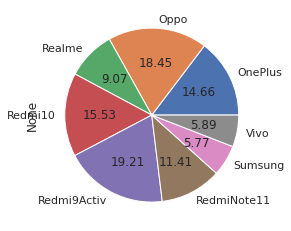

In [84]:
df.groupby('Brand').size().plot(kind='pie',autopct='%.2f')

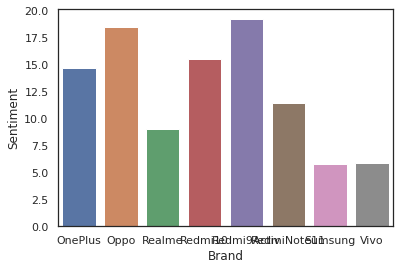

In [79]:
sns.barplot(x='Brand',y='Sentiment',data=df,estimator=lambda x:len(x)/len(df)*100)

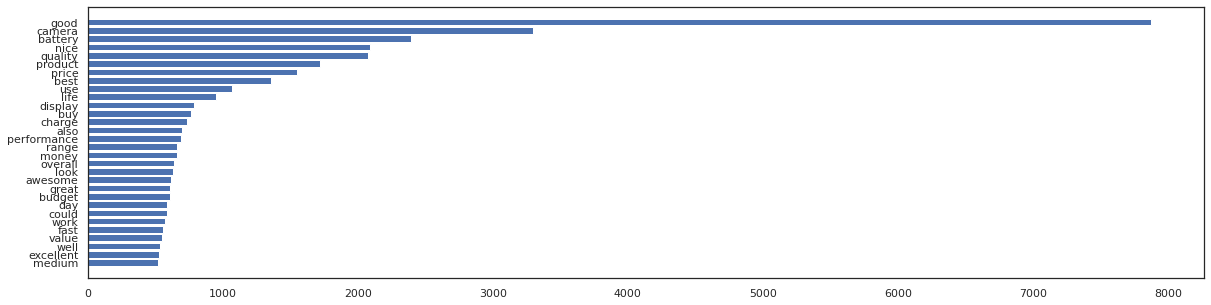

In [66]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Sentiment'] == 1.0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

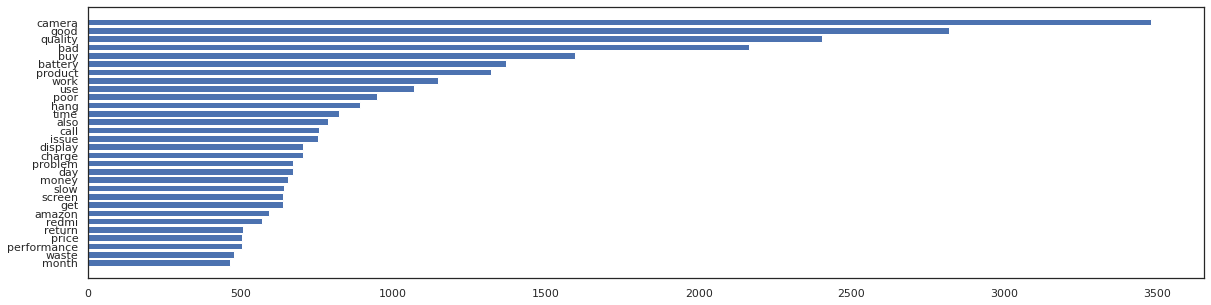

In [67]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data

# Subset positive review dataset
all_words_df = df.loc[df['Sentiment'] == 0.0,:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [43]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["review_processed"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [44]:
df.head()

,Review-Body,review_processed,Rating,Brand,Review-Title,Sentiment,neg,neu,pos,compound
0,Hang problem,hang problem,1.0,OnePlus,Worst phone ever,0.0,0.730,0.270,0.000,-0.4019
1,I'm writing this review after using 3days !!!B...,write review use 3days honest normal android p...,2.0,OnePlus,Ok !!! Not up to the mark,0.0,0.121,0.805,0.074,-0.2732
2,Camera is so good n very fast phone back look ...,camera good fast back look awesomewith dis pri...,5.0,OnePlus,Awesome look,1.0,0.000,0.676,0.324,0.9847
3,The media could not be loaded.\n ...,medium could load average product decent day d...,3.0,OnePlus,One plus losing is originality!!!,0.0,0.052,0.692,0.255,0.9493
4,I got my delivery on 23 feb when I unboxed the...,get delivery feb unboxed display damage reques...,1.0,OnePlus,Read,0.0,0.101,0.662,0.237,0.7650


In [45]:
df.to_csv('Review.csv')

In [46]:
df.shape

(23159, 10)

In [47]:
#add number of characters column
df["nb_chars"] = df["review_processed"].apply(lambda x: len(x))

# add number of words column
df["nb_words"] = df["review_processed"].apply(lambda x: len(x.split(" ")))

In [48]:
df.shape

(23159, 12)

In [49]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["review_processed"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df["review_processed"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [50]:
df.shape

(23159, 17)

# TFIDF

In [51]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["review_processed"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index =df.index
df = pd.concat([df, tfidf_df], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [52]:
# show is_bad_review distribution
df["Sentiment"].value_counts(normalize = True)

1.0    0.596658
0.0    0.403342
Name: Sentiment, dtype: float64

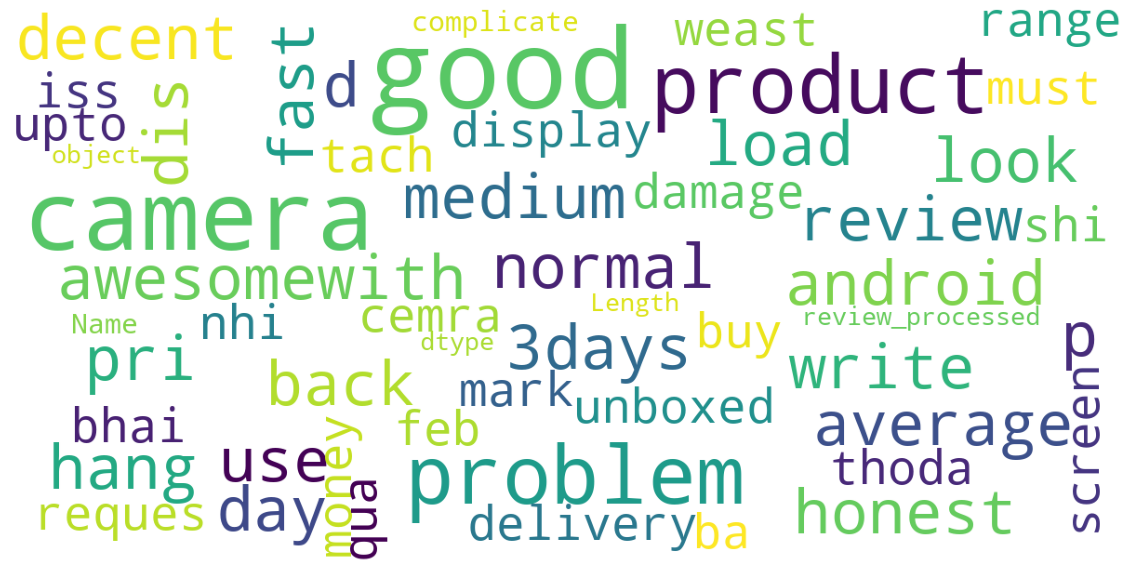

In [53]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["review_processed"])

In [54]:
data=df.sort_values(by='pos',ascending=False)
data.head()

,Review-Body,review_processed,Rating,Brand,Review-Title,Sentiment,neg,neu,pos,compound,...,word_wrost,word_xiaomi,word_xiomi,word_year,word_yes,word_yesterday,word_yet,word_youtube,word_zero,word_zoom
9093,Good,good,4.0,Realme,Good product,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6987,Good,good,4.0,Oppo,Good,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7048,excellent,excellent,5.0,Oppo,Very good Services,1.0,0.0,0.0,1.0,0.5719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7047,Good,good,5.0,Oppo,Very good,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7043,Good,good,5.0,Oppo,Amazing product,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
data_realme=data.loc[data['Brand'] == 'Realme']
data_realme.head()

,Review-Body,review_processed,Rating,Brand,Review-Title,Sentiment,neg,neu,pos,compound,...,word_wrost,word_xiaomi,word_xiomi,word_year,word_yes,word_yesterday,word_yet,word_youtube,word_zero,word_zoom
9093,Good,good,4.0,Realme,Good product,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8892,Good phone,good,5.0,Realme,Good phone,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9034,So good,good,5.0,Realme,Verry good,1.0,0.0,0.0,1.0,0.4404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9025,"Fine, satisfied with this phone",fine satisfy,4.0,Realme,Good phone,1.0,0.0,0.0,1.0,0.5859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9022,Best,best,5.0,Realme,Best,1.0,0.0,0.0,1.0,0.6369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data_realme.shape

(2100, 1553)

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review-Body", "pos","Brand","Rating"]].head(10)

,Review-Body,pos,Brand,Rating
23763,Good good good good good good good good good g...,1.000,Vivo,4.0
20930,"Nice one, Nice one, Nice one, Nice one, Nice o...",1.000,RedmiNote11,5.0
7680,Very good phone love it loved it loved it and ...,0.965,Oppo,3.0
6346,Nice looking wow wow wow,0.934,Oppo,5.0
17162,Very nice phone thank u amazon i m so happy☺☺...,0.932,Redmi9Activ,5.0
16732,Great phone. Value for money. True value,0.921,Redmi9Activ,5.0
17832,Excellent value of money.. Thanks Amazon,0.915,Redmi9Activ,5.0
4962,"Nice value,and warmth is so cool I hope this p...",0.902,Oppo,5.0
16153,Wow great phone camera is super and battery is...,0.902,Redmi9Activ,5.0
7596,Good bast prodaact betat thaten good good good...,0.897,Oppo,5.0


# Positive Review

In [85]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Review-Body", "pos"]].head(10)

,Review-Body,pos
23763,Good good good good good good good good good g...,1.000
20930,"Nice one, Nice one, Nice one, Nice one, Nice o...",1.000
7680,Very good phone love it loved it loved it and ...,0.965
6346,Nice looking wow wow wow,0.934
17162,Very nice phone thank u amazon i m so happy☺☺...,0.932
16732,Great phone. Value for money. True value,0.921
17832,Excellent value of money.. Thanks Amazon,0.915
4962,"Nice value,and warmth is so cool I hope this p...",0.902
16153,Wow great phone camera is super and battery is...,0.902
7596,Good bast prodaact betat thaten good good good...,0.897


# Negative Review

```



In [86]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Review-Body", "neg"]].head(10)
    

,Review-Body,neg
10824,Redami 10prime mobile Camera is bad quality Ba...,0.840
4065,A bad phone.. Badly made. Display is bad.,0.835
15057,"Very bad, after 3 months, ic and ip damage... ...",0.825
17197,After 6 months it lags and stuck. Very bad exp...,0.786
11345,Waste of money. poor performance so bad. Sound...,0.758
10676,Phones lags so much it's so annoying.its waste...,0.739
16790,"Waste camera, waste display, waste sound overa...",0.737
3436,This phone is so bad ...camera quality is so p...,0.731
23194,Worst camera worst display worst phone ever I ...,0.724
5761,Worst mobile hanging . Worst app for shopping,0.717


# Sentiment Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



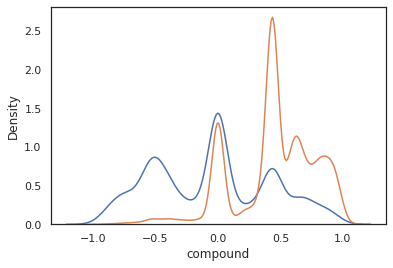

In [87]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = df[df['Sentiment'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [88]:
df.drop(['Brand','sentiment'],axis=1,inplace=True)

In [89]:
df.drop(['Review-Title'],axis=1,inplace=True)

In [90]:
df.head(2)

,Review-Body,review_processed,Rating,Sentiment,neg,neu,pos,compound,nb_chars,nb_words,...,word_wrost,word_xiaomi,word_xiomi,word_year,word_yes,word_yesterday,word_yet,word_youtube,word_zero,word_zoom
0,Hang problem,hang problem,1.0,0.0,0.730,0.270,0.000,-0.4019,12,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,I'm writing this review after using 3days !!!B...,write review use 3days honest normal android p...,2.0,0.0,0.121,0.805,0.074,-0.2732,263,39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df.to_csv('review.csv')

In [125]:
# feature selection
label = "Sentiment"
ignore_cols = [label, "Review-Body", "review_processed","Rating"]
features = [c for c in df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)


In [108]:
X_train

,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,...,word_wrost,word_xiaomi,word_xiomi,word_year,word_yes,word_yesterday,word_yet,word_youtube,word_zero,word_zoom
22610,0.057,0.594,0.349,0.9062,162,28,-0.171399,0.058053,0.044455,-0.199473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
21180,0.270,0.525,0.205,-0.3818,200,28,-0.094580,0.146845,0.151590,-0.225731,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11629,0.000,1.000,0.000,0.0000,31,5,0.043128,-0.029320,-0.076251,0.055256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
6438,0.000,0.000,1.000,0.4215,4,1,0.063899,0.016609,-0.028301,-0.015683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
21055,0.061,0.677,0.263,0.9948,1655,247,-0.885394,-0.216615,1.102966,-1.400456,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,0.000,1.000,0.000,0.0000,26,4,-0.183975,0.073997,0.103880,-0.232817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
22137,0.000,0.674,0.326,0.4404,48,7,-0.013994,0.005378,0.101426,-0.157989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
5569,0.000,1.000,0.000,0.0000,4,1,-0.073898,-0.078032,0.110363,-0.044911,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
866,0.150,0.598,0.252,0.1027,95,18,-0.126936,0.110126,0.081634,-0.273074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


# Random Forest

In [120]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
6,doc2vec_vector_0,0.061138
7,doc2vec_vector_1,0.059076
8,doc2vec_vector_2,0.058488
10,doc2vec_vector_4,0.058165
9,doc2vec_vector_3,0.057732
3,compound,0.045414
2,pos,0.038023
0,neg,0.030404
1,neu,0.028559
4,nb_chars,0.027629


In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.8897008710283693

In [ ]:
from sklearn.metrics import confusion_matrix


# Decision Tree

In [99]:

# train a Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.077778
2,pos,0.067807
0,neg,0.062069
6,doc2vec_vector_0,0.048240
7,doc2vec_vector_1,0.041409
9,doc2vec_vector_3,0.040067
10,doc2vec_vector_4,0.039983
8,doc2vec_vector_2,0.039899
1,neu,0.039402
4,nb_chars,0.027377


In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.7381946132857876

# XGB

In [101]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(learning_rate=1)
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])

0.8840988117428671

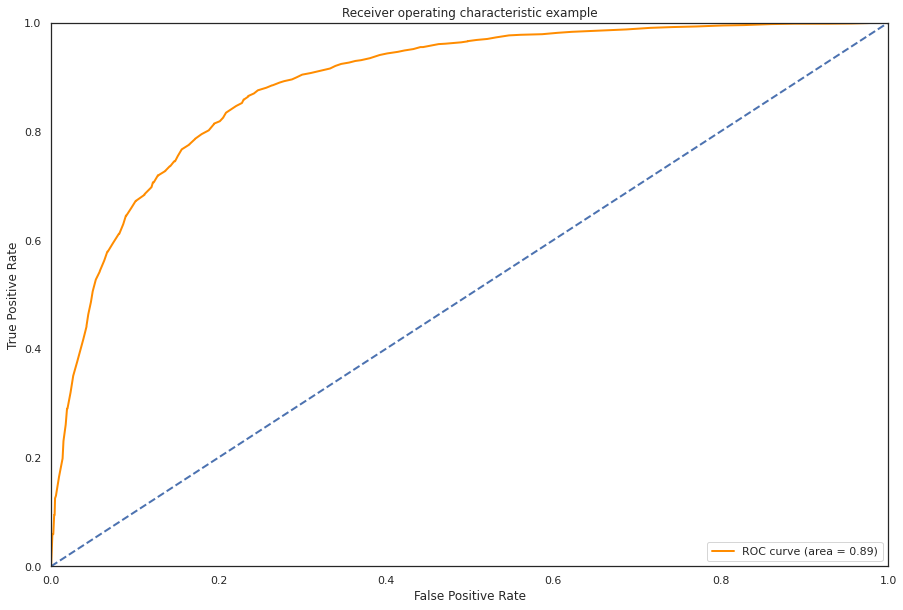

In [102]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()